# Python数据分析建模--分类与预测
* 作者：[梁斌](https://drbinliang.github.io/)
* 日期：2017/02/16

## 项目简介
* [项目地址](https://www.kaggle.com/uciml/glass)
* 任务：根据玻璃材料的9个属性对未知的玻璃类别进行分类和预测

# 1. 准备阶段
## 加载相关模块和库

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

%matplotlib inline

## 加载并查看数据

In [22]:
dataset_path = './dataset/glass.csv'
data = pd.read_csv(dataset_path)
feature_names = data.columns[:-1].tolist()
print('数据形状：', data.shape)
print('共有{}条记录'.format(data.shape[0]))
print('共有{}个特征：{}'.format(len(feature_names), feature_names))

print()
print('数据预览：')
data.head()

print('属性类型：')
data.dtypes

数据形状： (214, 10)
共有214条记录
共有9个特征：['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

数据预览：
属性类型：


RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# 2. 数据分析及可视化
## 查看统计信息

In [3]:
print('数据统计信息：')
data.describe()

数据统计信息：


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


通过简单的查看，发现特征数据的范围不一致，对模型的学习过程有一定影响。比如RI和Si的均值相差过大，不在同一个数值范围中。

接下来查看各类别的数据记录个数。

In [4]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

类别分布不平衡，其中类别1和2占了大多数。

## 数据可视化
查看特征的数据分布情况

偏度(skewness)
* [Wikipedia](https://zh.wikipedia.org/wiki/%E5%81%8F%E5%BA%A6)
* [百度百科](http://baike.baidu.com/item/%E5%81%8F%E5%BA%A6/8626571?fr=aladdin)

例子：
![偏度值为正](./pos_skew.png) 例如：工资数据。一个公司中许多员工得到的工资相对较少，而越来越少的人得到非常高的工资。
![偏度值为负](./neg_skew.png) 例如：灯泡。极少量的灯泡会立即烧坏，大多数灯泡会持续相当长的时间。

C:\Anaconda2\envs\py35\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


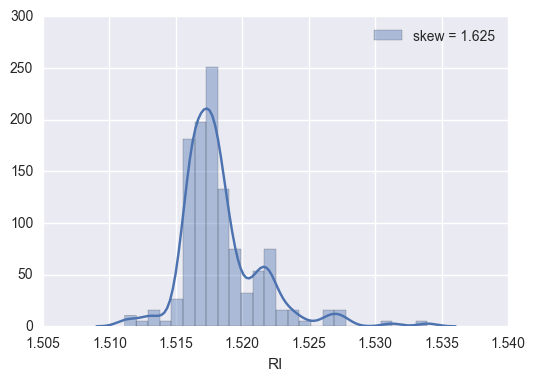

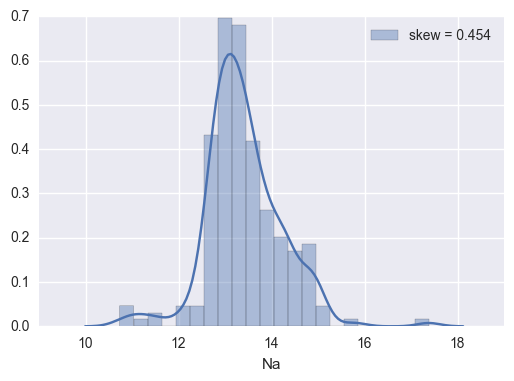

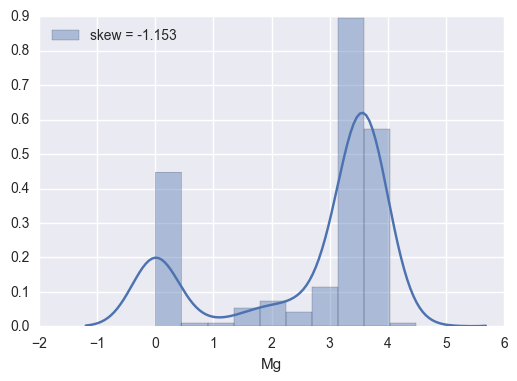

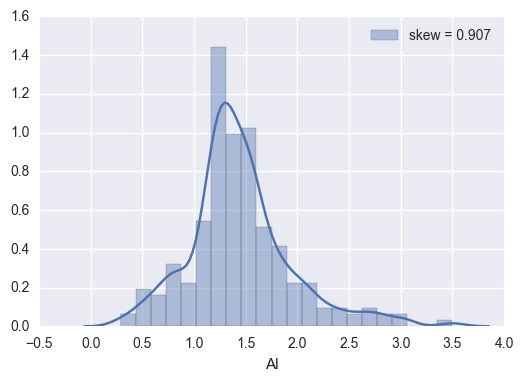

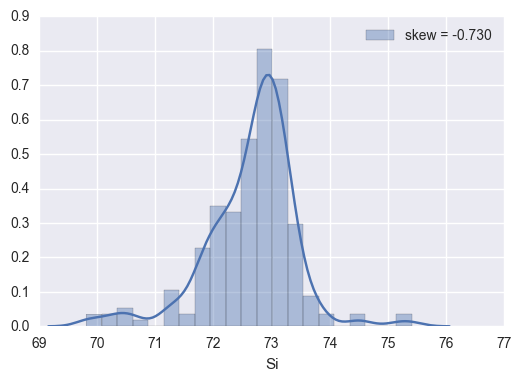

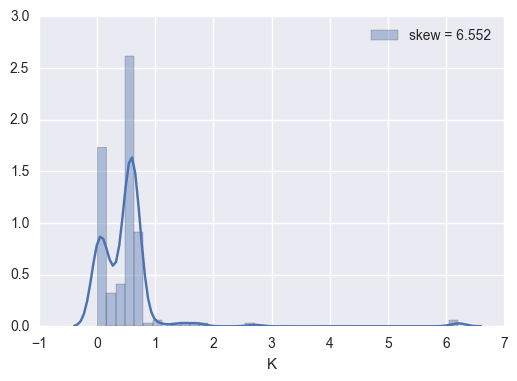

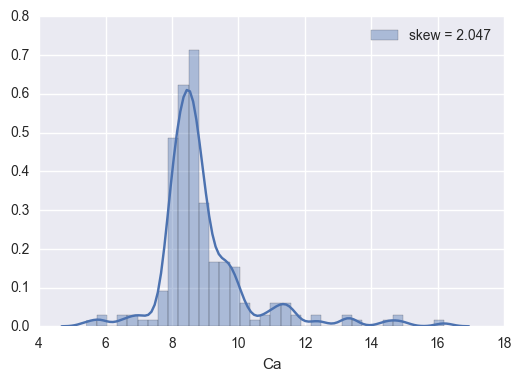

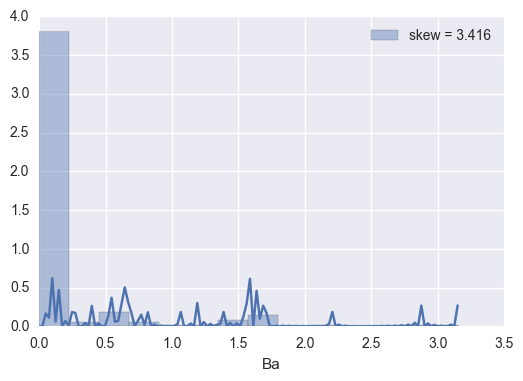

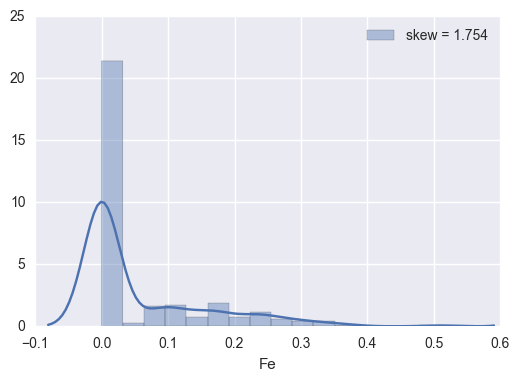

In [5]:
for feature in feature_names:
    skew = data[feature].skew()
    sns.distplot(data[feature], label='skew = %.3f' %(skew))
    plt.legend(loc='best')
    plt.show()

C:\Anaconda2\envs\py35\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


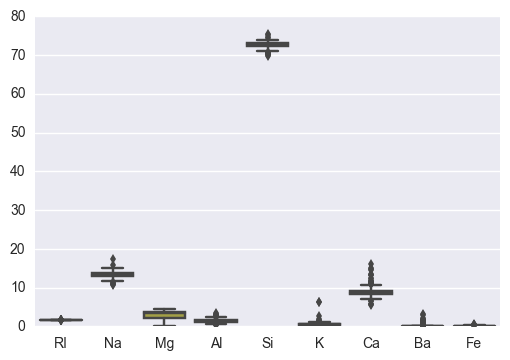

In [6]:
sns.boxplot(data[feature_names])
plt.show()

多变量数据可视化

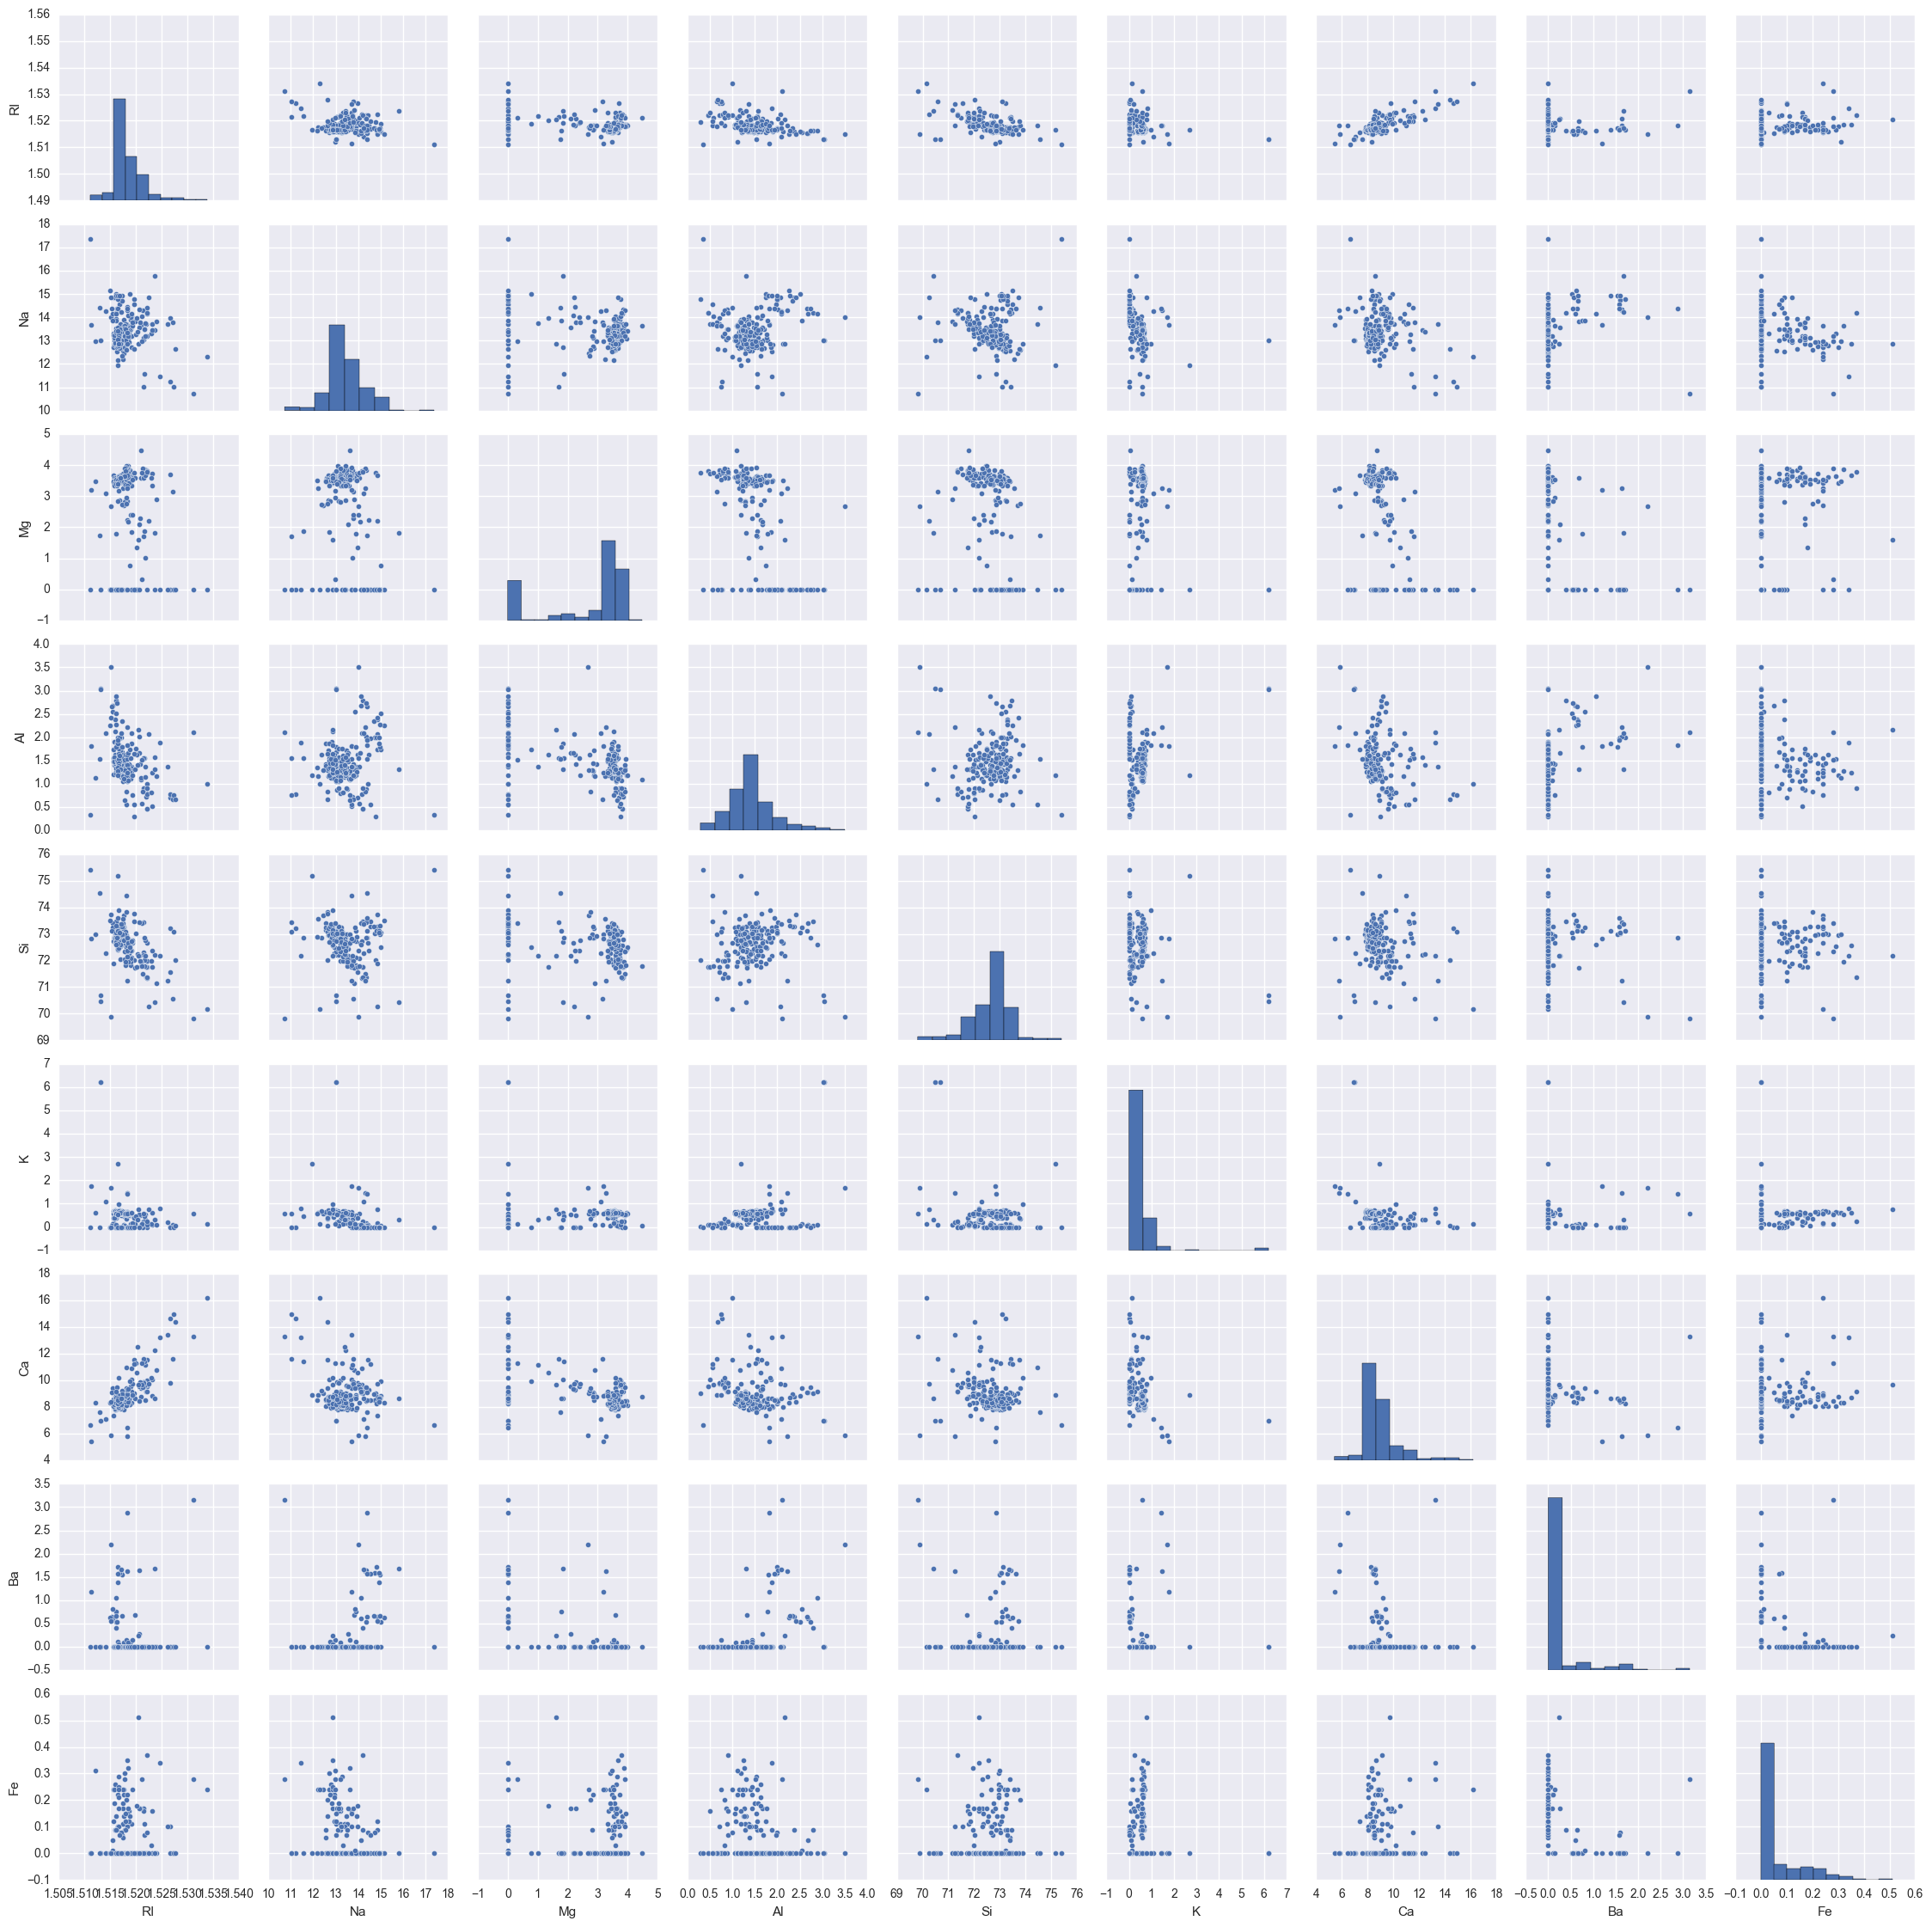

In [23]:
plt.figure(figsize=(8, 8))
sns.pairplot(data[feature_names])
plt.show()

# 3. 数据处理
## 分割数据集

In [17]:
X = data[feature_names].values
y = data['Type'].values

# 随机数生成种子
seed = 5
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

# 4. 数据建模

交叉验证：
1: 0.7137
2: 0.6758
3: 0.6395
4: 0.6534
5: 0.6342
6: 0.6463
7: 0.6108
8: 0.5943
9: 0.5822
10: 0.5650
11: 0.5783
12: 0.6002
13: 0.5894
14: 0.5823
15: 0.5761


C:\Anaconda2\envs\py35\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda2\envs\py35\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda2\envs\py35\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda2\envs\py35\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 7 members, which is too few. The minimum

16: 0.6103
17: 0.5930
18: 0.6092
19: 0.6092
20: 0.6044
21: 0.5996
22: 0.6166
23: 0.5952
24: 0.6019
25: 0.5952
26: 0.5885
27: 0.5902
28: 0.6087
29: 0.6020
30: 0.5936
最优K:  1


C:\Anaconda2\envs\py35\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda2\envs\py35\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda2\envs\py35\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda2\envs\py35\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 7 members, which is too few. The minimum

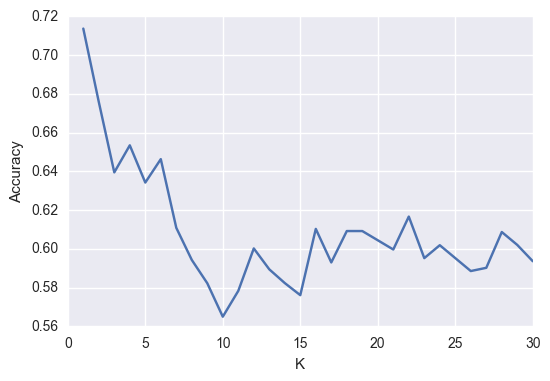

In [21]:
# 选择模型，交叉验证
k_range = range(1, 31)
cv_scores = []
print('交叉验证：')
for k in k_range:
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    score_mean = scores.mean()
    cv_scores.append(score_mean)
    print('%i: %.4f' % (k, score_mean))

best_k = np.argmax(cv_scores) + 1
print('最优K: ', best_k)

plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

# 5. 分类和预测
* knn模型
![knn](./knn.png)

In [20]:
# 训练模型
knn_model = KNeighborsClassifier(best_k)
knn_model.fit(X_train, y_train)
print('测试模型，准确率：', knn_model.score(X_test, y_test))

测试模型，准确率： 0.767441860465


# 6. 思考：如何提升准确率？

* a. 非平衡样本数据处理
* b. 特征归一化
* c. 尝试其他分类预测模型
* d. 尝试获得更多数据